# Solution to Assignment2  Q2
**work by : Ruturaj Marathe (rmarathe@iu.edu)**

The aim of this assignment is to build a binary classifier that predicts and classifies the employees of any company based on weather they will leave the company or not, Considering various features that we will see below. 
Dataset source: https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\rutur\AppData\Local\Temp\ipykernel_18184\3878756672.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [65]:
dataframe=pd.read_csv('./Employee.csv') # loading the data into dataset.
dataframe

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [66]:
dataframe.shape # number of observations and attrinutes

(4653, 9)

In [67]:
# checking if there are any null or missing values
print(dataframe.isna().sum()) 
print(dataframe.isnull().any())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64
Education                    False
JoiningYear                  False
City                         False
PaymentTier                  False
Age                          False
Gender                       False
EverBenched                  False
ExperienceInCurrentDomain    False
LeaveOrNot                   False
dtype: bool


In [68]:
dataframe.columns # these are the columns from the employee dataset

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [69]:
dataframe.info() # display the type of data and some information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [70]:
numeric_cols = dataframe.select_dtypes(include='int64') # those columns that have numeric data
print(numeric_cols)

      JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  LeaveOrNot
0            2017            3   34                          0           0
1            2013            1   28                          3           1
2            2014            3   38                          2           0
3            2016            3   27                          5           1
4            2017            3   24                          2           1
...           ...          ...  ...                        ...         ...
4648         2013            3   26                          4           0
4649         2013            2   37                          2           1
4650         2018            3   27                          5           1
4651         2012            3   30                          2           0
4652         2015            3   33                          4           0

[4653 rows x 5 columns]


In [71]:
categorical_cols = dataframe.select_dtypes(include=['object']) # columns with categorical data.
print(categorical_cols)

      Education       City  Gender EverBenched
0     Bachelors  Bangalore    Male          No
1     Bachelors       Pune  Female          No
2     Bachelors  New Delhi  Female          No
3       Masters  Bangalore    Male          No
4       Masters       Pune    Male         Yes
...         ...        ...     ...         ...
4648  Bachelors  Bangalore  Female          No
4649    Masters       Pune    Male          No
4650    Masters  New Delhi    Male          No
4651  Bachelors  Bangalore    Male         Yes
4652  Bachelors  Bangalore    Male         Yes

[4653 rows x 4 columns]


In [73]:
for i in dataframe.columns:
    print(i," : ", dataframe[i].unique()) # checking how scattered the values of each columns are.

Education  :  ['Bachelors' 'Masters' 'PHD']
JoiningYear  :  [2017 2013 2014 2016 2015 2012 2018]
City  :  ['Bangalore' 'Pune' 'New Delhi']
PaymentTier  :  [3 1 2]
Age  :  [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
Gender  :  ['Male' 'Female']
EverBenched  :  ['No' 'Yes']
ExperienceInCurrentDomain  :  [0 3 2 5 1 4 7 6]
LeaveOrNot  :  [0 1]


In [74]:
dataframe.duplicated().sum() # checking for duplicate entries.

1889

In [75]:
dataframe.drop_duplicates(inplace=True) # deleteing the duplicate entries as they are unneccessary data
dataframe.duplicated().sum()

0

In [76]:
dataframe.shape # the size of the dataframe after deleting duplicates

(2764, 9)

In [77]:
dataframe.describe() # displays the statistical values for the numeric columns

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [78]:
for i in dataframe.columns:
    print(i," : ", dataframe[i].unique())

Education  :  ['Bachelors' 'Masters' 'PHD']
JoiningYear  :  [2017 2013 2014 2016 2015 2012 2018]
City  :  ['Bangalore' 'Pune' 'New Delhi']
PaymentTier  :  [3 1 2]
Age  :  [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
Gender  :  ['Male' 'Female']
EverBenched  :  ['No' 'Yes']
ExperienceInCurrentDomain  :  [0 3 2 5 1 4 7 6]
LeaveOrNot  :  [0 1]


In [79]:
dataframe.nunique() # count of uniques values for all columns

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

# Q1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?

DISPLAYS THE STATISTICAL VALUES

In [80]:
dataframe.describe() 

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


CODE TO PLOT THE HISTOGRAMS FOR ALL COLUMNS TO GET INSIGHTS AND TRENDS OF THE DATA.

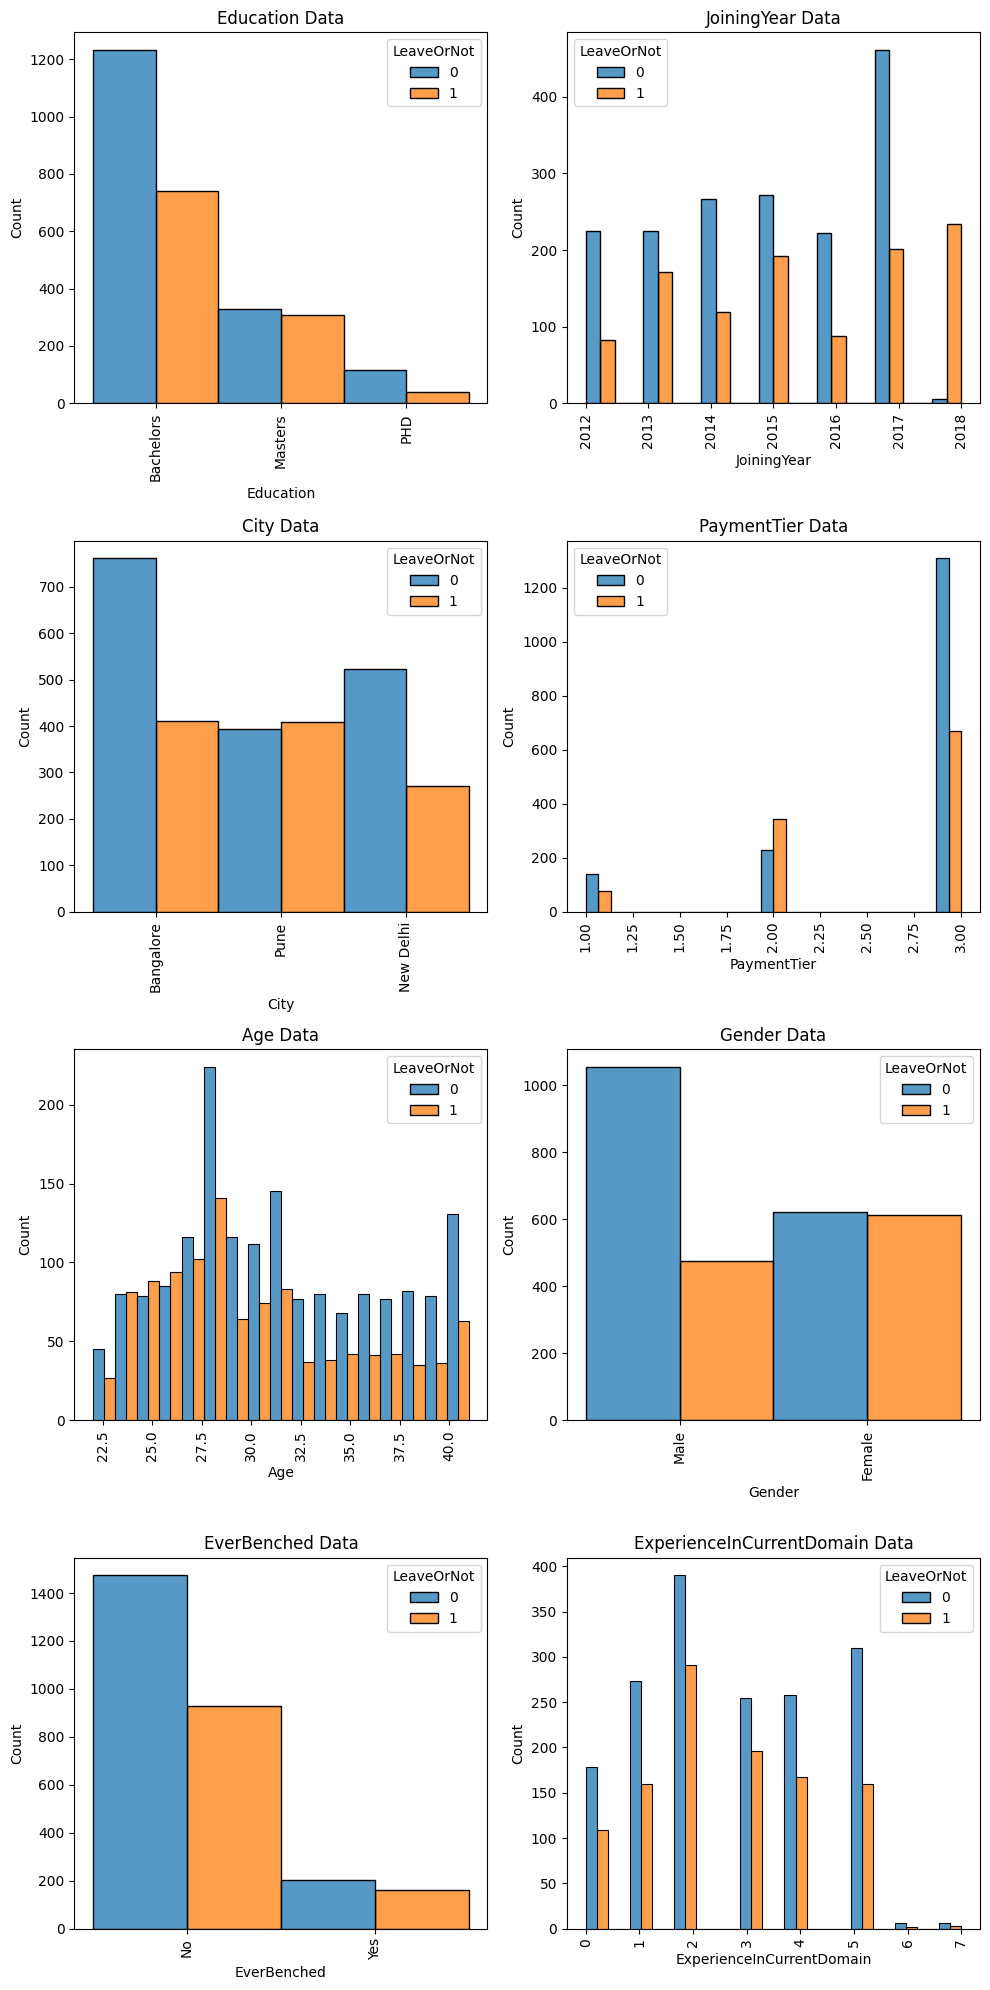

In [81]:
plt.figure(figsize = (10, 20))
for i, col in enumerate(dataframe.columns[:-1], 1):
    plt.subplot(4, 2, i)
    sns.histplot(x = dataframe[col], hue = dataframe["LeaveOrNot"], multiple = "dodge")
    plt.title(f"{col} Data")
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.plot()


From the histograms above my insights: if a significant number of employees who have been benched (Ever Benched Data) are leaving, this could indicate a trend where benching leads to dissatisfaction and eventual departure. Similarly, if there’s a noticeable trend of employees within a certain age range or payment tier leaving, these could be areas to investigate further.

In [82]:
categorical_cols

,Education,City,Gender,EverBenched
0,Bachelors,Bangalore,Male,No
1,Bachelors,Pune,Female,No
2,Bachelors,New Delhi,Female,No
3,Masters,Bangalore,Male,No
4,Masters,Pune,Male,Yes
...,...,...,...,...
4648,Bachelors,Bangalore,Female,No
4649,Masters,Pune,Male,No
4650,Masters,New Delhi,Male,No
4651,Bachelors,Bangalore,Male,Yes


The above categorical columns need to be handled as it we need numeric data to proceed further. These are the attributes that need special handling. we will use the label  **Label Encoding**.

In [83]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataframe['Education'] = label_encoder.fit_transform(dataframe['Education'])
dataframe['City'] = label_encoder.fit_transform(dataframe['City'])
dataframe['Gender'] = label_encoder.fit_transform(dataframe['Gender'])
dataframe['EverBenched'] = label_encoder.fit_transform(dataframe['EverBenched'])

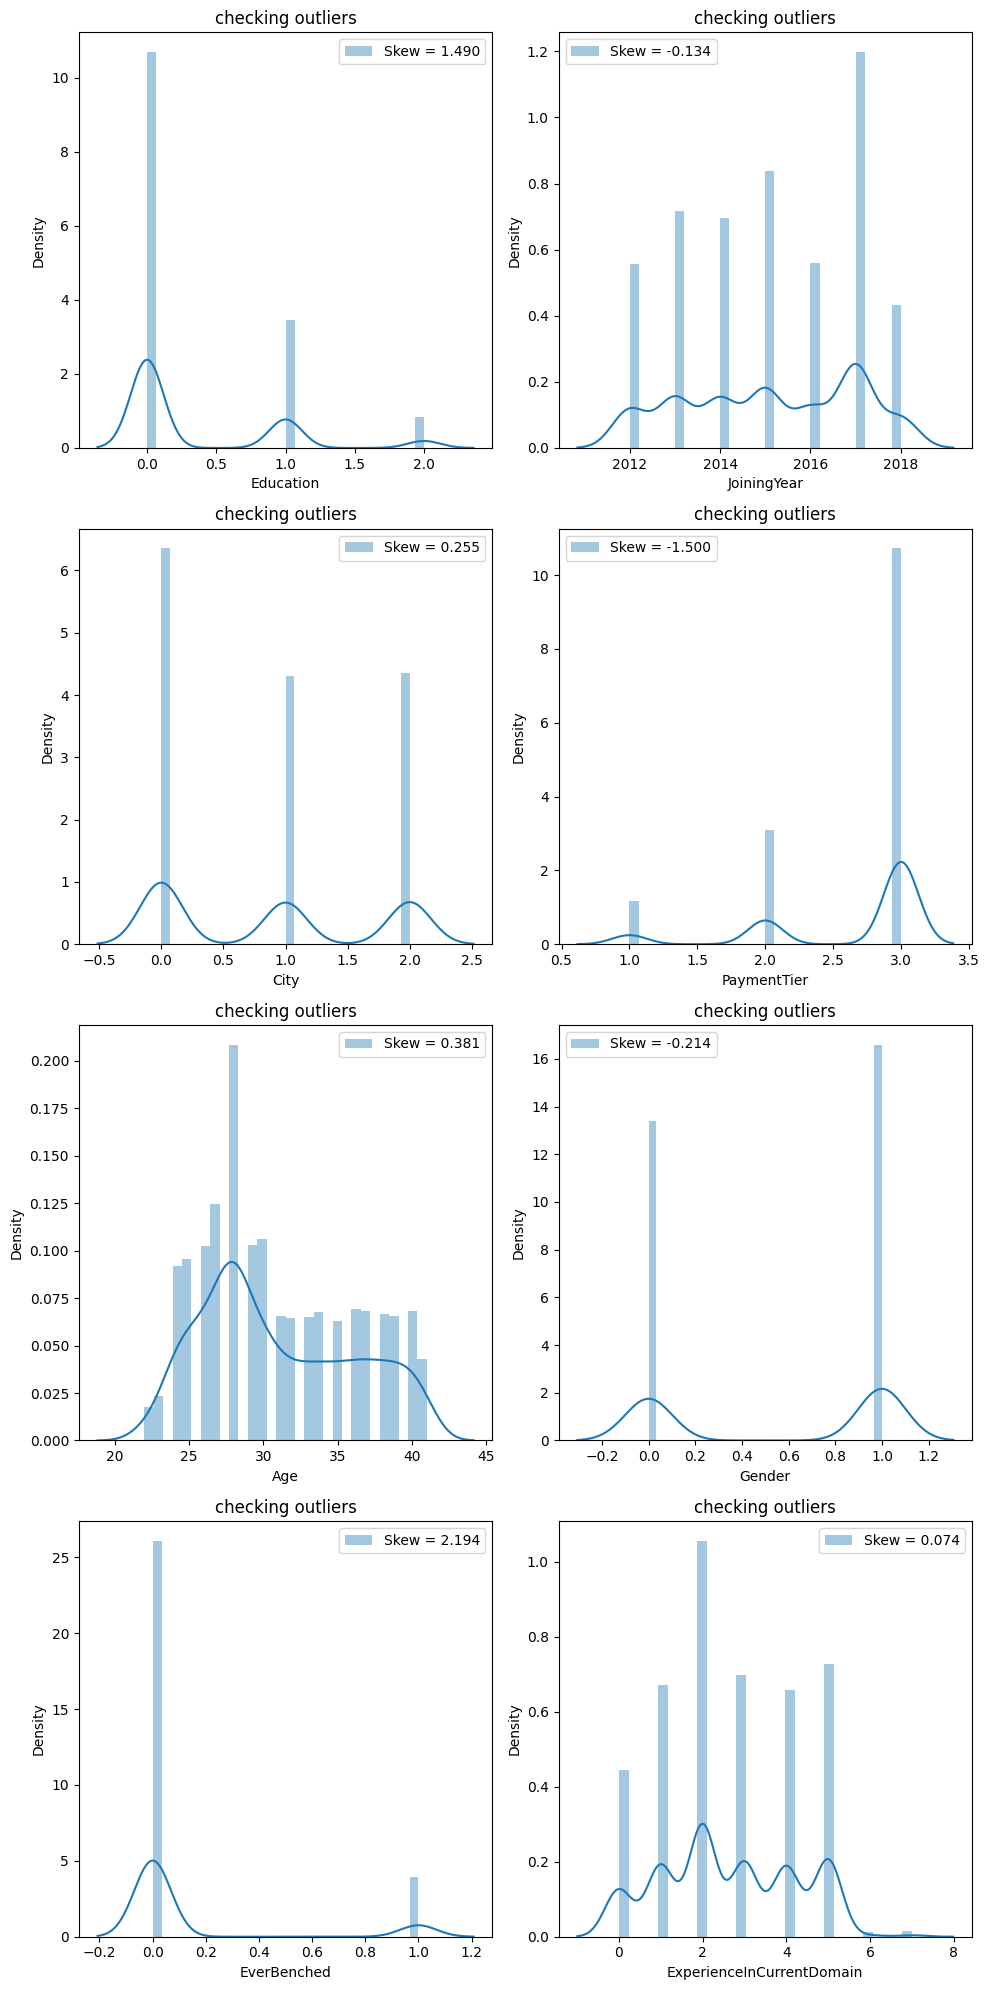

In [84]:
plt.figure(figsize = (10, 20))
for i, col in enumerate(dataframe.columns[:-1], 1):
    plt.subplot(4, 2, i)
    skewness = dataframe[col].skew()
    sns.distplot(dataframe[col], label = "Skew = %.3f" %(skewness), bins = 30)
    plt.title(f"checking outliers")
    plt.legend(loc = "best")
    plt.tight_layout()
    plt.plot()

In the above graph we are checking for outliers in the data distribution, as indicated by the title on each plot. The skewness value is also provided for each distribution to quantify its asymmetry. The plots use blue lines to represent the density of data points, with some having bars to represent frequency or count.The columns names are along the horizontal axis for each plot.

# Q2. Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [3 points]

From the above plot we can observe that there are no features that contain outliers, as most of the attributes have a normlly distributed curve.

**Categorical Data with Two Categories:**
- Education, City, and Gender data show comparisons between two groups. For instance, there are more individuals with education level 1 than 0.

**Time Series or Ordinal Data:**
- Joining Year and Age data exhibit trends over time or across age groups. The Joining Year shows fluctuations, while Age data increases until age 35, then decreases.

**Categorical Data with Multiple Categories:**
- Payment Tier and Experience in Current Domain data compare multiple categories within a single variable, with Payment Tier 2 having the highest count.

**the Pearson Correlation Coefficient (PCC)**

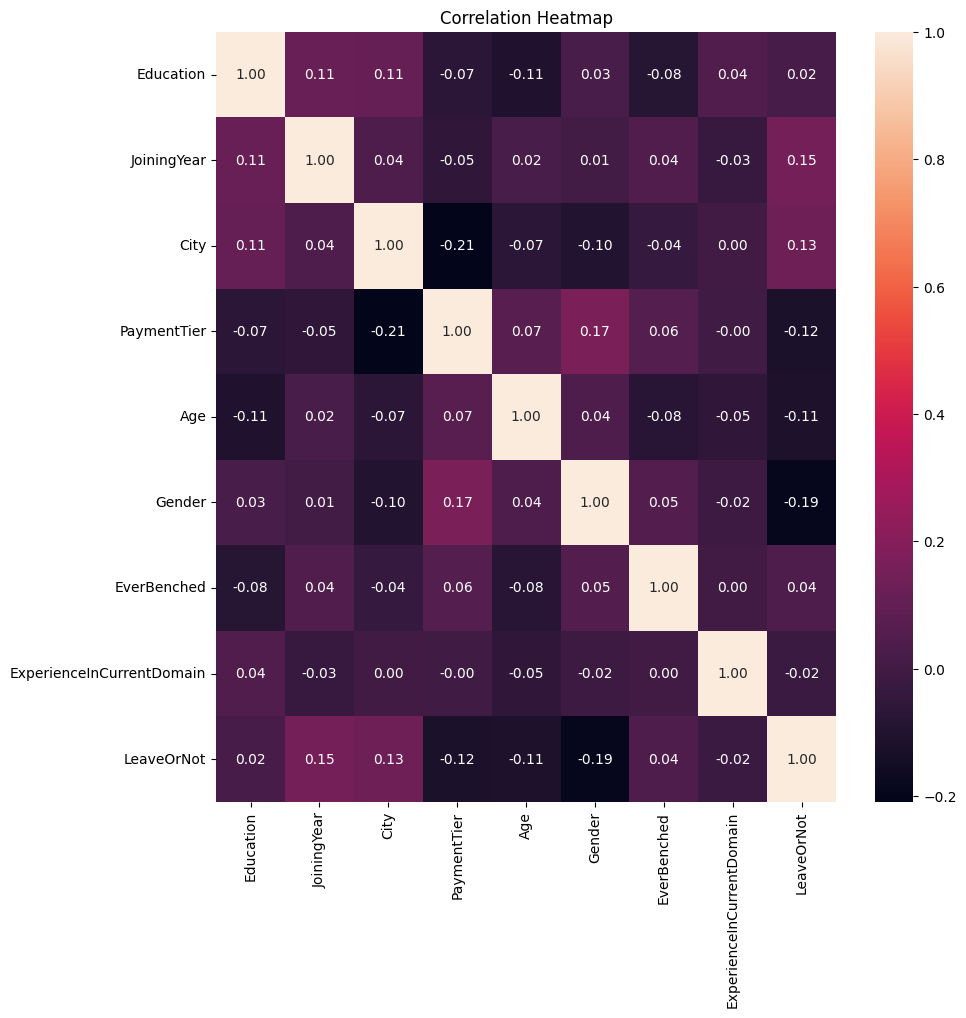

In [23]:
plt.figure(figsize=(10, 10))
correlation = dataframe.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**the scatter plots for all the columns**

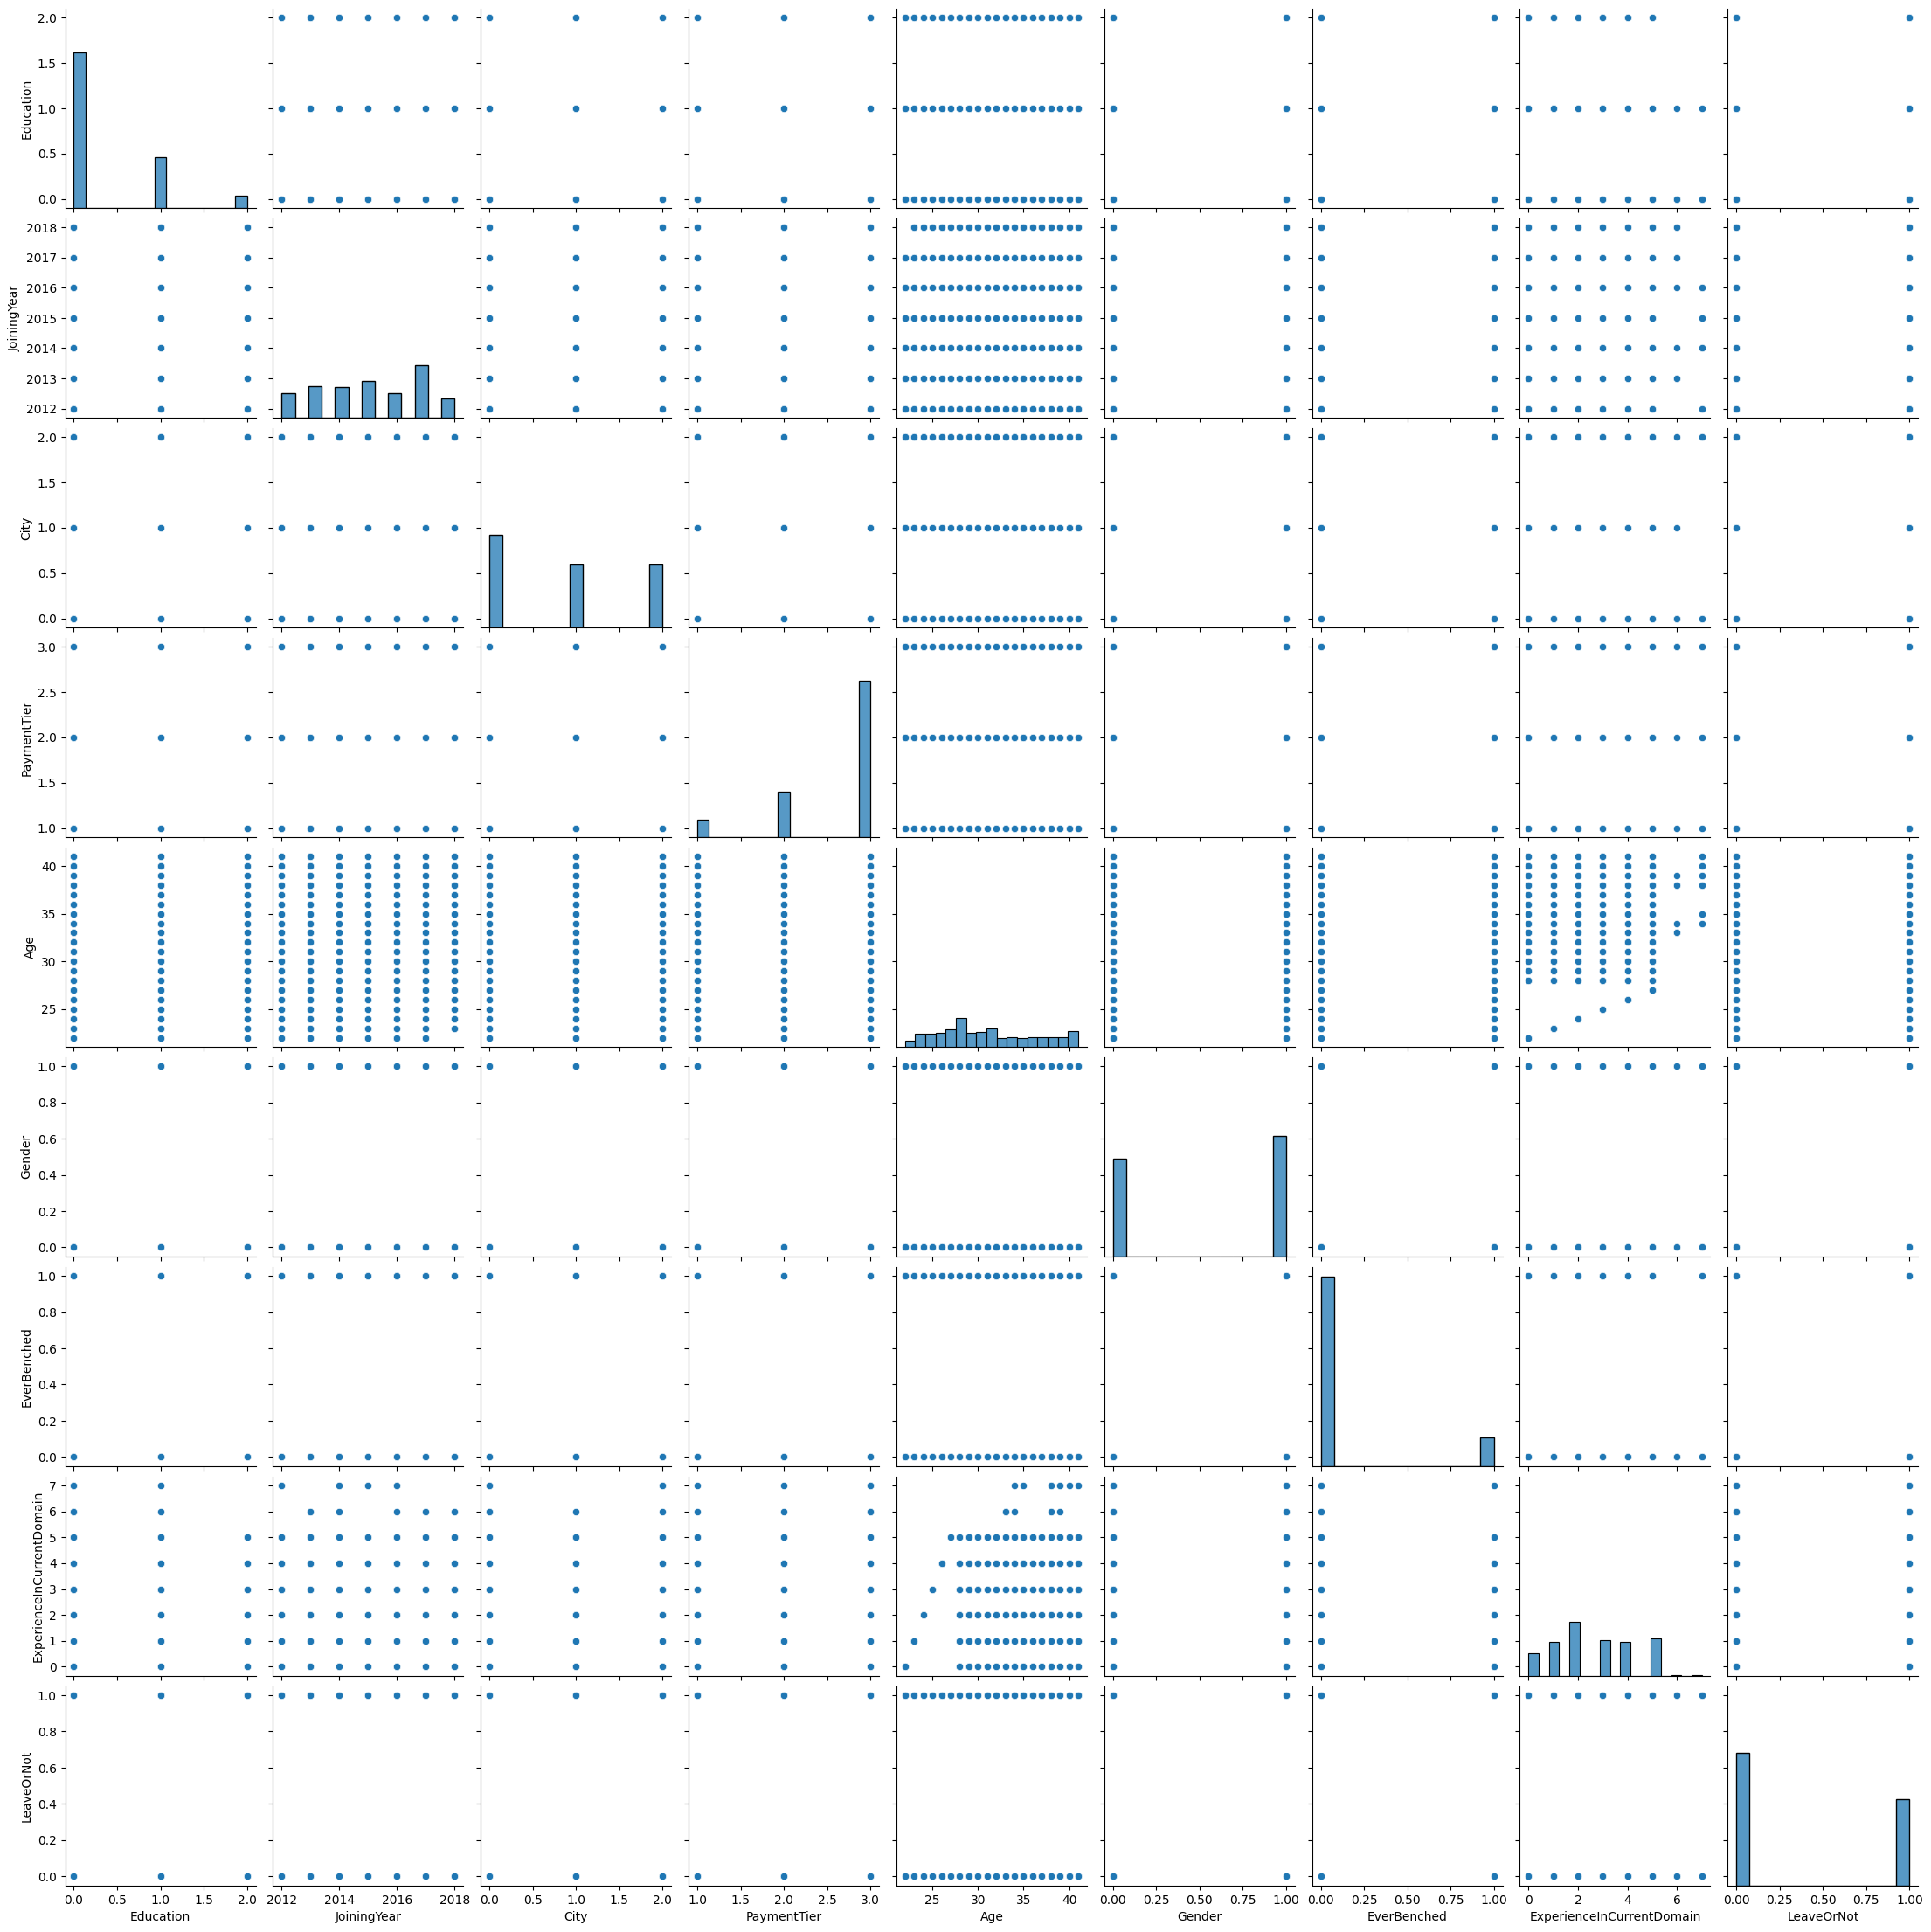

In [85]:
import seaborn as sns
sns.pairplot(dataframe)
plt.show()

The scatter plot here is not very useful in this scenario as there are less contious data present.

# For training data, use token numbers 1-10, for validation 11 to 13, and for testing 14 to 16 (each of the 30 rock subtypes has 16 token numbers). [2 points] 

**SPLITTING THE DATA INTO TRAINNING, TESTING AND VALIDATION IN THE FOLLOWING WAY:**
1. TRAINNING - 70%
2. VALIDATION - 15% 
3. TESTING - 15% 

In [25]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(dataframe, test_size=0.3, random_state=42,shuffle=True)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42,shuffle=True)
print("Shape of Train_df:", train_df.shape)
print("Shape of Val_df:", val_df.shape)
print("Shape of Test_df:", test_df.shape)

Shape of Train_df: (1934, 9)
Shape of Val_df: (415, 9)
Shape of Test_df: (415, 9)


In [26]:
dataframe.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [27]:
X_train = train_df.drop('LeaveOrNot', axis=1)
y_train = train_df['LeaveOrNot']
X_val = val_df.drop('LeaveOrNot', axis=1)
y_val = val_df['LeaveOrNot']
X_test = test_df.drop('LeaveOrNot', axis=1)
y_test = test_df['LeaveOrNot']
# Display the shapes of the datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1934, 8)
Shape of y_train: (1934,)
Shape of X_val: (415, 8)
Shape of y_val: (415,)
Shape of X_test: (415, 8)
Shape of y_test: (415,)


In [28]:
# Verify the proportions
train_proportion = len(X_train) / len(dataframe)
val_proportion = len(X_val) / len(dataframe)
test_proportion = len(X_test) / len(dataframe)
train_proportion, val_proportion, test_proportion

(0.6997105643994211, 0.15014471780028943, 0.15014471780028943)

In [29]:
label_distribution = pd.DataFrame({
'Overall': dataframe['LeaveOrNot'].value_counts(normalize=True),
'Training': y_train.value_counts(normalize=True),
'Validation': y_val.value_counts(normalize=True),
'Testing': y_test.value_counts(normalize=True)
})
label_distribution

,Overall,Training,Validation,Testing
LeaveOrNot,,,,
0,0.606368,0.608583,0.590361,0.612048
1,0.393632,0.391417,0.409639,0.387952


# Q4. Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution): 
**1. Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations. [10 points]**

**2.Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.  [10 points]**

**3.Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node. [10 points]**

**multinomial logistic regression**

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [10,20,30,50,100]
}

# Assuming X_train and y_train are already defined
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', random_state=42), param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_classifier_lr = grid_search.best_estimator_
best_hyperparameters_lr = grid_search.best_params_
y_train_pred_lr = best_classifier_lr.predict(X_train)
y_val_pred_lr = best_classifier_lr.predict(X_val)
y_test_pred_lr = best_classifier_lr.predict(X_test)

print("Best Hyperparameters:", best_hyperparameters_lr)  # Best Hyperparameters

Best Hyperparameters: {'C': 100, 'max_iter': 50, 'solver': 'lbfgs'}


These are the hypterparameters for Softmax Function:
- Regularization parameter (C): Controls the trade-off between fitting the training data well
and preventing overfitting by penalizing large coefficients.
- The value of **C = 100** is the best for this classifier.
- Solver (solver): Determines the optimization algorithm used to fit the model. Common
choices include ‘lbfgs’, ‘sag’, ‘saga’, and ‘newton-cg’.
- The solver  **‘lbfgs’** is the best choice and performs well for this calssifer.
- Maximum number of iterations (max_iter): Specifies the maximum number of iterations
for the solver to converge. Higher values may be necessary for complex datasets or slowconverging solvers.
- The algorithm converges in **50** iterations.
- Multi-class handling (multi_class): Defines how the model handles multi-class classification.
‘multinomial’ is typically used for softmax regression as it directly optimizes the multinomial
logistic loss. Although we are solving a binary classification problem, using it as it is mentioned in the question.

**LET'S NOW LOOK AT THE TRAINNING,  VALIDATION AND TESTING PERFORMANCE**

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classifier(y_true, y_pred, label):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{label} Accuracy: {accuracy:.4f}")
    print(f"{label} Precision: {precision:.4f}")
    print(f"{label} Recall: {recall:.4f}")
    print(f"{label} F1 Score: {f1:.4f}")
    
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_train, y_train_pred_lr, "Training")

Training Accuracy: 0.6655
Training Precision: 0.6615
Training Recall: 0.6655
Training F1 Score: 0.6313


In [32]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_val, y_val_pred_lr, "Validation")

Validation Accuracy: 0.6530
Validation Precision: 0.6609
Validation Recall: 0.6530
Validation F1 Score: 0.6117


In [33]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_test, y_test_pred_lr, "Test")

Test Accuracy: 0.6699
Test Precision: 0.6669
Test Recall: 0.6699
Test F1 Score: 0.6343


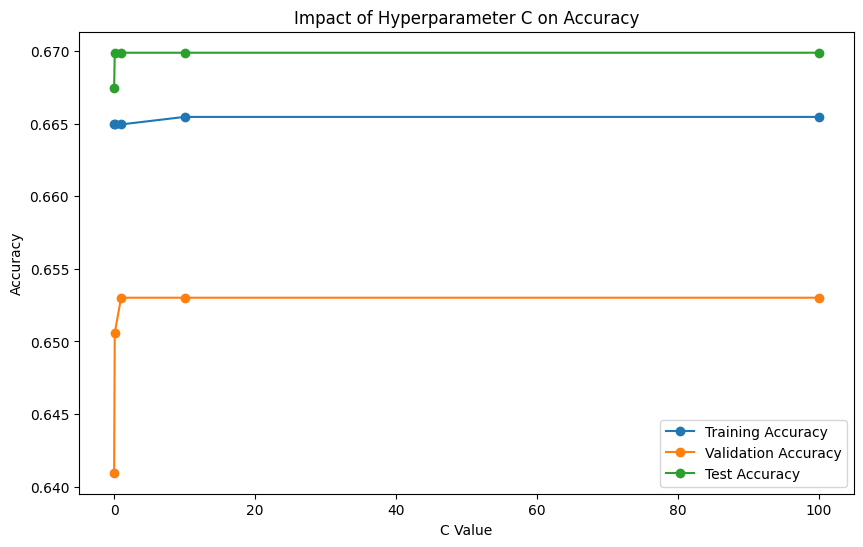

In [34]:
# Define the range of C values you want to visualize
C_values = [0.01, 0.1, 1, 10, 100]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different C values
for c in C_values:
    lr_model = LogisticRegression(multi_class='multinomial', C=c, solver='lbfgs', max_iter=50, random_state=42)
    lr_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = lr_model.predict(X_train)
    y_val_pred = lr_model.predict(X_val)
    y_test_pred = lr_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(C_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter C on Accuracy')
plt.legend()
plt.show()

**FROM THE GRAPH WE CAN OBSERVE THAT THE ACCURACY BECOMES CONSTANT AFTER THE VALUES OF HYPERPARAMETER C REACHES AROUND 10 FOR ALL THE TRAINNING, TESTING VALIDATION SET. In summary, while the hyperparameter C does not affect the training accuracy, it appears to negatively impact both the validation and test accuracies as its value increases. This could indicate overfitting, where the model performs well on the training data but poorly on unseen data**

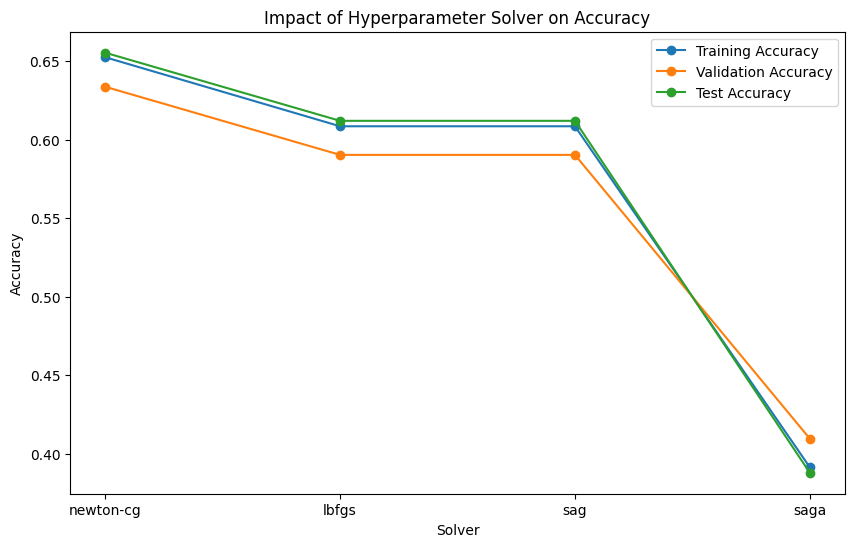

In [35]:
# Impact of solver on accuracy
# Define the range of C values you want to visualize
solver_values = ['newton-cg', 'lbfgs', 'sag', 'saga']
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different C values
for s in solver_values:
    lr_model = LogisticRegression(multi_class='multinomial', C=10, solver=s, max_iter=10, random_state=42)
    lr_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = lr_model.predict(X_train)
    y_val_pred = lr_model.predict(X_val)
    y_test_pred = lr_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
    
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solver_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(solver_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(solver_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Solver on Accuracy')
plt.legend()
plt.show()

**ON COMPARING THE DIFFERENT SOLVERS, WE CAN OBSERVE THAT THE HYPEEPARAMETER - SOLVER OF TYPE NEWTON-CG PERFORMS VERY WELL FOR ALL THE THREE SETS AS WE CAN OBSERVE THE PLOT OF ACCURACY VS SOLVER. tHE ACCURACY IS ABOUT 65 % WHICH I BELEIVE IS FAIRLY GOOD.** 

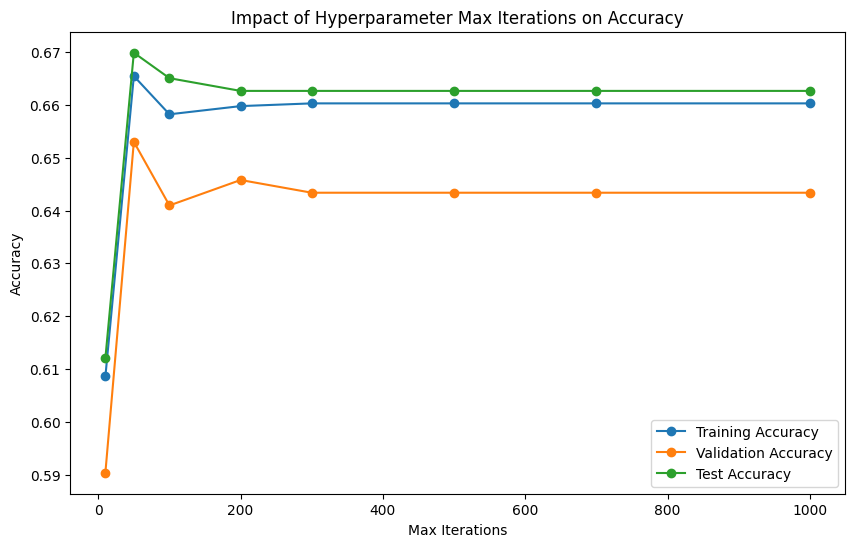

In [36]:
# impact of max_iter on accuracy
# Define the range of C values you want to visualize
max_iter_values = [10, 50, 100, 200, 300, 500, 700, 1000]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different C values
for m in max_iter_values:
    lr_model = LogisticRegression(multi_class='multinomial', C=100, solver='lbfgs', max_iter=m, random_state=42)
    lr_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = lr_model.predict(X_train)
    y_val_pred = lr_model.predict(X_val)
    y_test_pred = lr_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(max_iter_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(max_iter_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Max Iterations on Accuracy')
plt.legend()
plt.show()

UPTO THE VALUE OF 200 THE MODEL PERFOMS WELL ADNAFTER THAT AS NUMBER OF ITERATION INCREASES THE PERFROMANCE REMAINS CONSTANT

In [39]:
#import svm
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import random

# param_grid = {
#     'C': [0.075, 0.09, 0.5, 1, 10],
#     'kernel': ['linear', 'poly', 'rbf','sigmoid'],
#     'degree': [2, 3, 4],
#     'gamma': ['scale', 'auto']
# }
param_grid = {'C': [random.randint(1, 100) for _ in range(3)],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [random.randint(2, 5)]}

# SVM_grid_search = GridSearchCV(SVC(random_state=42, probability=True), param_grid, cv=5, n_jobs=-1)
SVM_grid_search = RandomizedSearchCV(SVC(random_state=42, probability=True), param_distributions=param_grid, n_iter=10, cv=5)
SVM_grid_search.fit(X_train, y_train)

best_classifier_svm = SVM_grid_search.best_estimator_
best_hyperparameters_svm = SVM_grid_search.best_params_
y_train_pred_svm = best_classifier_svm.predict(X_train)

y_val_pred_svm = best_classifier_svm.predict(X_val)
y_test_pred_svm = best_classifier_svm.predict(X_test)

print("Best Hyperparameters:", best_hyperparameters_svm)  # Best Hyperparameters

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 0.01, 'degree': 2, 'C': 78}


In [40]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_train, y_train_pred_svm, "Training")

Training Accuracy: 0.7870
Training Precision: 0.7969
Training Recall: 0.7870
Training F1 Score: 0.7759


In [41]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_val, y_val_pred_svm, "Validation")

Validation Accuracy: 0.7614
Validation Precision: 0.7854
Validation Recall: 0.7614
Validation F1 Score: 0.7443


In [42]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_test, y_test_pred_svm, "Test")

Test Accuracy: 0.7566
Test Precision: 0.7665
Test Recall: 0.7566
Test F1 Score: 0.7405


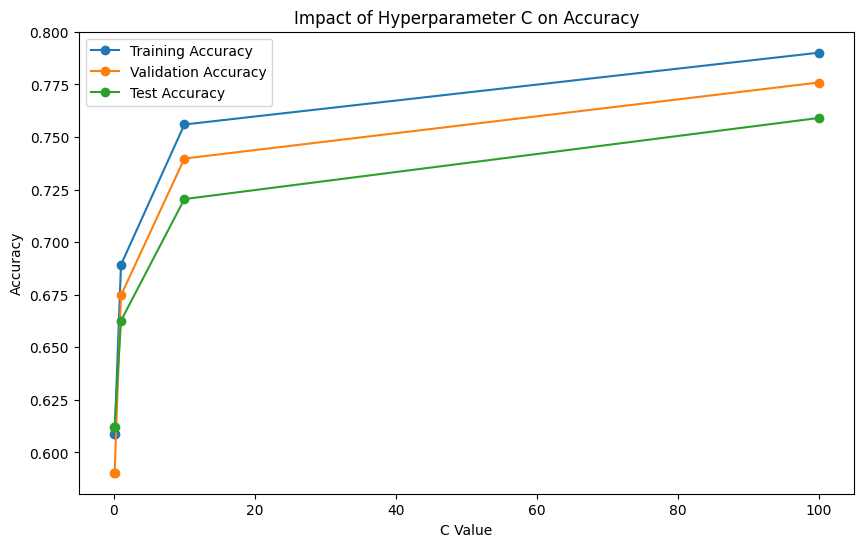

In [47]:
# Define the range of C values you want to visualize
C_values = [0.01, 0.1, 1, 10, 100]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different C values
for c in C_values:
    svm_model = SVC(C=c, kernel='rbf', degree=2, gamma=0.01, random_state=42)
    svm_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = svm_model.predict(X_train)
    y_val_pred = svm_model.predict(X_val)
    y_test_pred = svm_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(C_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter C on Accuracy')
plt.legend()

**As the value of C increases, all three accuracies increase but at different rates. The Training Accuracy increases steadily, while the Validation and Test Accuracies plateau after an initial sharp increase. THE ELBOW  I.E VALUE OF AROUND 12 IS THE BEST FOR C**

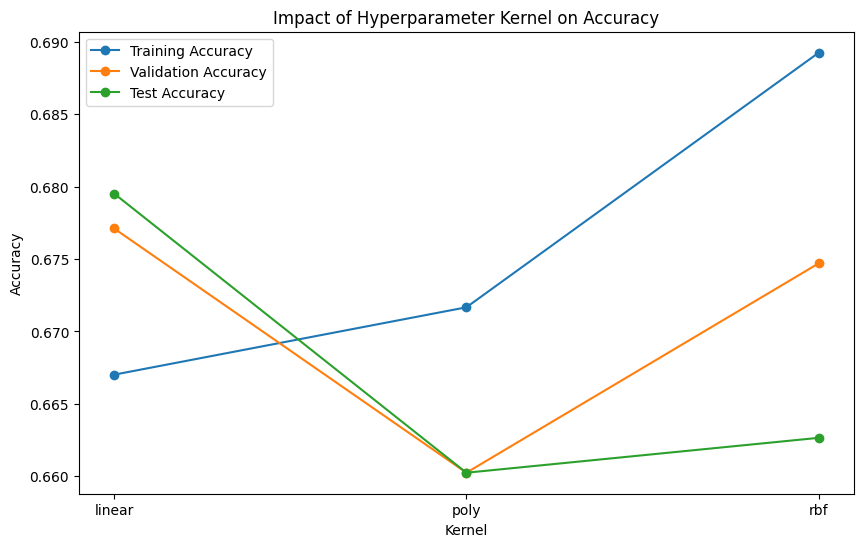

In [48]:
# Impact of kernel on accuracy
# Define the range of C values you want to visualize
kernel_values = ['linear', 'poly', 'rbf']
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different C values
for k in kernel_values:
    svm_model = SVC(C=1, kernel=k, degree=2, gamma=0.01, random_state=42)
    svm_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = svm_model.predict(X_train)
    y_val_pred = svm_model.predict(X_val)
    y_test_pred = svm_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
# plot the data
plt.plot(kernel_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(kernel_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(kernel_values, test_accuracies, label='Test Accuracy', marker = 'o')
# add labels to the plot
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Kernel on Accuracy')
plt.legend()

**Radial Basis Function (RBF) kernel is generally a good choice. It’s known to perform very well on a large variety of problems and is the most commonly used kernel for Support Vector Machines (SVM). In our graph too,rbf is the best fit for a model.**

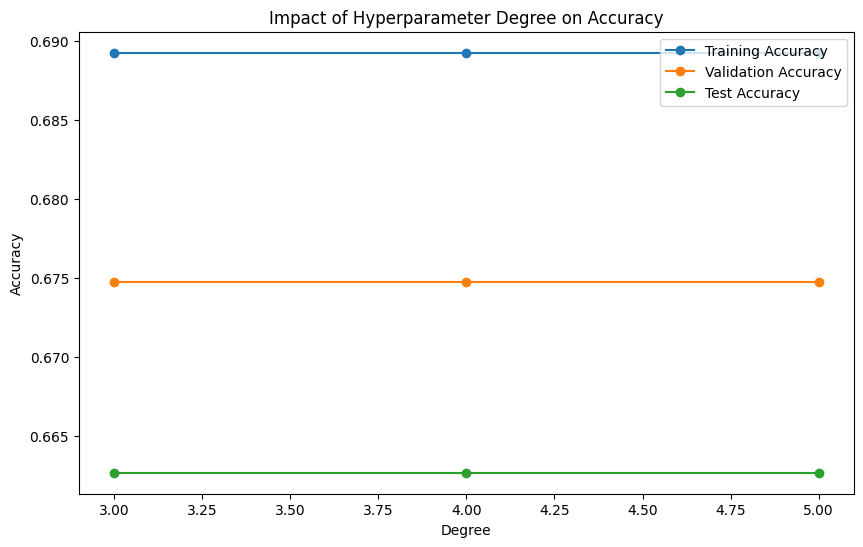

In [49]:
# Impact of degree on accuracy
# Define the range of C values you want to visualize
degree_values = [3, 4, 5]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different C values
for d in degree_values:
    svm_model = SVC(C=1, kernel='rbf', degree=d, gamma=0.01, random_state=42)
    svm_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = svm_model.predict(X_train)
    y_val_pred = svm_model.predict(X_val)
    y_test_pred = svm_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
# plot the data
plt.plot(degree_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(degree_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(degree_values, test_accuracies, label='Test Accuracy', marker = 'o')
# add labels to the plot
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Degree on Accuracy')
plt.legend()

**the difference between the acccuracies across all the three sets is very less, so we can say that the degree does not affect too much in this situation.**

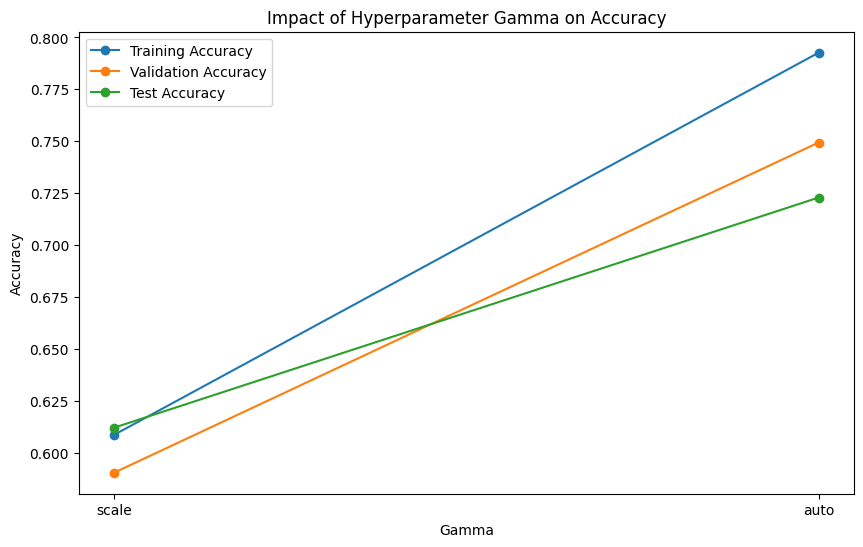

In [50]:
# Impact of gamma on accuracy
# Define the range of C values you want to visualize
gamma_values = ['scale', 'auto']
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different C values
for g in gamma_values:
    svm_model = SVC(C=1, kernel='rbf', degree=2, gamma=g, random_state=42)
    svm_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = svm_model.predict(X_train)
    y_val_pred = svm_model.predict(X_val)
    y_test_pred = svm_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
# plot the data
plt.plot(gamma_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(gamma_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(gamma_values, test_accuracies, label='Test Accuracy', marker = 'o')
# add labels to the plot
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Gamma on Accuracy')
plt.legend()

**The choice between ‘scale’, ‘auto’:**
**If gamma='scale', then it uses 1 / (n_features * X.var()) as the value of gamma.**
**If gamma='auto', it uses 1 / n_features12 as the value. When I used auto, the accuracy was much higher.**

In [52]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

RF_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
RF_grid_search.fit(X_train, y_train)

best_classifier_rf = RF_grid_search.best_estimator_
best_hyperparameters_rf = RF_grid_search.best_params_
y_train_pred_rf = best_classifier_rf.predict(X_train)
y_val_pred_rf = best_classifier_rf.predict(X_val)
y_test_pred_rf = best_classifier_rf.predict(X_test)

print("Best Hyperparameters:", best_hyperparameters_rf)  # Best Hyperparameters

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}


**max_depth: Determines the maximum depth of each tree. A deeper tree can capture more complex relationships but risks overfitting.**
**min_samples_leaf: Specifies the minimum number of samples required at a leaf node, helping prevent overfitting by avoiding overly small leaves.**
**min_samples_split: Determines the minimum number of samples required to split an internal node, allowing for a greater number of splits with a value of 2.**
**n_estimators: Refers to the number of trees in the forest, with more trees increasing robustness and accuracy, but also computational complexity.**

In [53]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_train, y_train_pred_rf, "Training")

Training Accuracy: 0.8407
Training Precision: 0.8543
Training Recall: 0.8407
Training F1 Score: 0.8337


In [54]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_val, y_val_pred_rf, "Validation")

Validation Accuracy: 0.7855
Validation Precision: 0.8046
Validation Recall: 0.7855
Validation F1 Score: 0.7734


In [55]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_test, y_test_pred_rf, "Test")

Test Accuracy: 0.8120
Test Precision: 0.8271
Test Recall: 0.8120
Test F1 Score: 0.8016


Text(0.5, 1.0, 'Feature Importances')

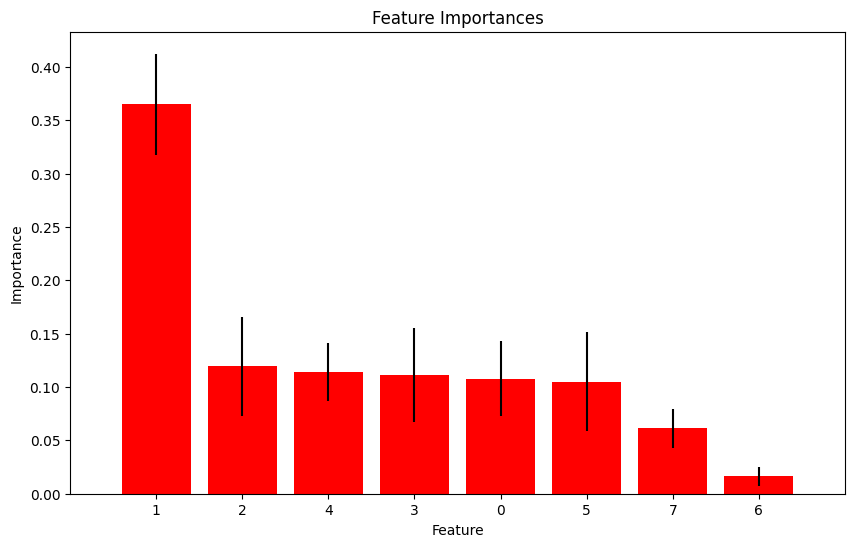

In [56]:
#Feature Importance
# Get feature importances
importances = best_classifier_rf.feature_importances_
# Get the standard deviation of feature importances
std = np.std([tree.feature_importances_ for tree in best_classifier_rf.estimators_], axis=0)
# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')


**The first columns has the highest relation with the values we are going predict i.e  whether a employee will leave the organization or not.** 

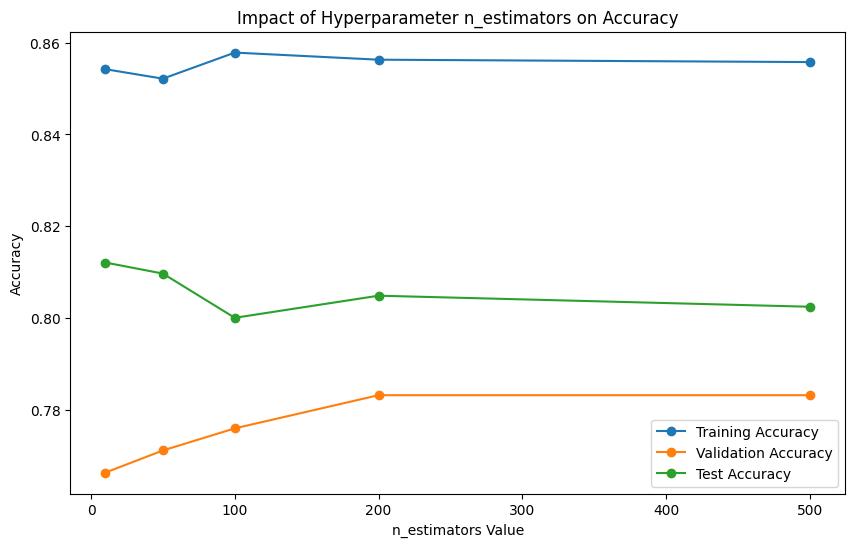

In [57]:
# Define the range of n_estimators values you want to visualize
n_estimators_values = [10, 50, 100, 200, 500]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different n_estimators values
for n in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n, max_depth=10, min_samples_split=4, min_samples_leaf=2, random_state=42)
    rf_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_test_pred = rf_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(n_estimators_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(n_estimators_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('n_estimators Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter n_estimators on Accuracy')
plt.legend()

**n_estimators value of 200 is the best suit for this model, after this there is no effect of the n-estimators with respect to accuracy**

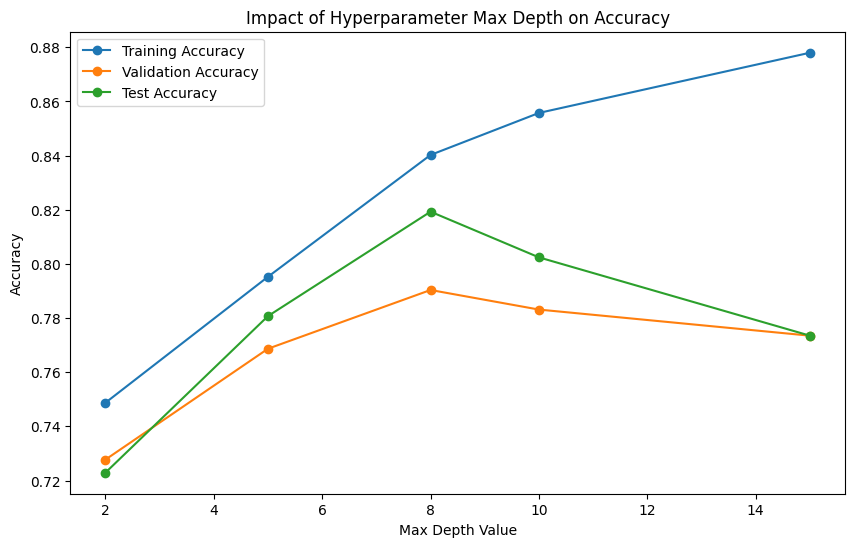

In [58]:
# Define the range of max_depth values you want to visualize
max_depth_values = [None,2, 5, 8, 10, 15]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different max_depth values
for m in max_depth_values:
    rf_model = RandomForestClassifier(n_estimators=500, max_depth=m, min_samples_split=4, min_samples_leaf=2, random_state=42)
    rf_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_test_pred = rf_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(max_depth_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(max_depth_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('Max Depth Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Max Depth on Accuracy')
plt.legend()

**from the above we can observe that the value of 8 for the max depth is leading to a high accuracy, this depth represents when the random forst should stop splitting**

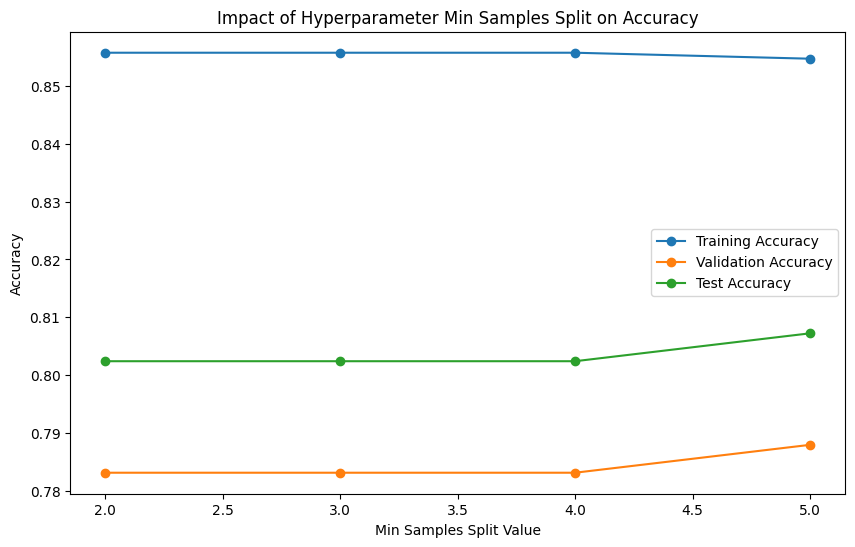

In [59]:
# Define the range of min_samples_split values you want to visualize
min_samples_split_values = [2, 3, 4, 5]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different min_samples_split values
for m in min_samples_split_values:
    rf_model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=m, min_samples_leaf=2, random_state=42)
    rf_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_test_pred = rf_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(min_samples_split_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(min_samples_split_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('Min Samples Split Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Min Samples Split on Accuracy')
plt.legend()

**The accuracy value for test and validation is increaseing after the value of 4 as minimum splits.**

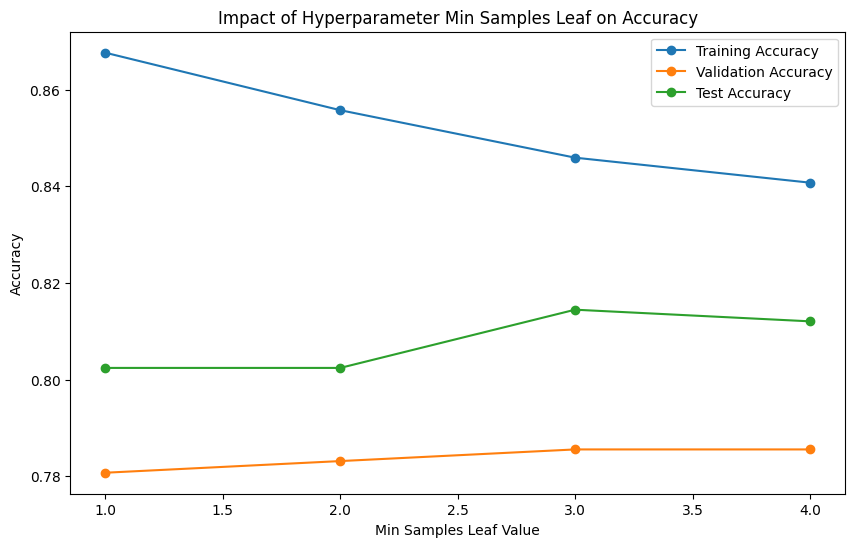

In [60]:
# Define the range of min_samples_leaf values you want to visualize
min_samples_leaf_values = [1, 2, 3, 4]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different min_samples_leaf values
for m in min_samples_leaf_values:
    rf_model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=4, min_samples_leaf=m, random_state=42)
    rf_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_test_pred = rf_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(min_samples_leaf_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(min_samples_leaf_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('Min Samples Leaf Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Min Samples Leaf on Accuracy')
plt.legend()

**The min samples leaf value of 1 is performing the best in our case.**

# Q5. Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings. [8 points]

In [62]:
# Combine the classifiers into an ensemble
from sklearn.ensemble import VotingClassifier

# Initialize the classifiers with the best hyperparameters
log_reg_best = LogisticRegression(**best_hyperparameters_lr, multi_class='multinomial', random_state=42)
svm_best = SVC(**best_hyperparameters_svm, probability=True, random_state=42)  # Set probability=True for soft voting
rf_best = RandomForestClassifier(**best_hyperparameters_rf, random_state=42, n_jobs=1)

# Create an ensemble of the classifiers using soft voting
ensemble = VotingClassifier(estimators=[
    ('lr', log_reg_best), 
    ('svm', svm_best), 
    ('rf', rf_best)
], voting='hard')

# Train the ensemble on the training set
ensemble.fit(X_train, y_train.values.ravel())

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=100, max_iter=50,
                                                 multi_class='multinomial',
                                                 random_state=42)),
                             ('svm',
                              SVC(C=78, degree=2, gamma=0.01, probability=True,
                                  random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=4,
                                                     n_estimators=500, n_jobs=1,
                                                     random_state=42))])

In [63]:
# Predict on test set
y_test_pred = ensemble.predict(X_test)
# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
# Print the performance metrics
print(f"Test accuracy: {test_accuracy}")
print(f"Test precision: {test_precision}")
print(f"Test recall: {test_recall}")
print(f"Test f1: {test_f1}") 

Test accuracy: 0.7831325301204819
Test precision: 0.7945703651049305
Test recall: 0.7831325301204819
Test f1: 0.7704215512870627


In [86]:
# Predict on val set
y_val_pred = ensemble.predict(X_val)
# Calculate performance metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
# Print the performance metrics
print(f"Val accuracy: {val_accuracy}")
print(f"Val precision: {val_precision}")
print(f"Val recall: {val_recall}")
print(f"Val f1: {val_f1}")


Val accuracy: 0.7566265060240964
Val precision: 0.779362929250556
Val recall: 0.7566265060240964
Val f1: 0.7391345572683293


In [87]:
# Predict on test set
y_test_pred = ensemble.predict(X_test)
# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
# Print the performance metrics
print(f"Test accuracy: {test_accuracy}")
print(f"Test precision: {test_precision}")
print(f"Test recall: {test_recall}")
print(f"Test f1: {test_f1}")

Test accuracy: 0.7831325301204819
Test precision: 0.7945703651049305
Test recall: 0.7831325301204819
Test f1: 0.7704215512870627


Logistic Regression (LR):
C=100: The inverse of regularization strength. A smaller value of C indicates stronger regularization, while a larger value allows the model to fit the training data more closely.
max_iter=50: Maximum number of iterations taken for the solvers to converge.
multi_class='multinomial': This parameter specifies the approach for handling multiple classes. 'Multinomial' indicates that the model should use the multinomial logistic regression approach.

Support Vector Machine (SVM):
C=78: Penalty parameter C of the error term.
degree=2: Degree of the polynomial kernel function. Here, it's set to 2, indicating a quadratic kernel.
gamma=0.01: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'.
probability=True: This parameter enables probability estimates.

Random Forest (RF):
max_depth=10: Maximum depth of the decision trees in the forest.
min_samples_leaf=4: Minimum number of samples required to be at a leaf node.
n_estimators=500: Number of trees in the forest.

Combining the output of these 3 we get approximately **78 % accuracy.**, while the individual accuracies were 65,75 and 78 for Logistic Regression, Support Vector Machine and Random Forest.

#REFERENCES
1. https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset
2. https://www.kaggle.com/code/mahad049/decision-tree
3. https://www.kaggle.com/code/ssyyhh/eda-and-classification-of-leaveornot-gbc
4. https://www.linkedin.com/pulse/tale-hyperparameter-tuning-random-search-cv-grid-swaroop-piduguralla/
5. https://www.geeksforgeeks.org/hyperparameter-tuning/
6. USED THE GROUP PROJECT CREATED BY GROUP 11 (RUTURAJ, PRACHI, NISARG AND PAVAN) - MY GROUP ASSIGNMENT.
7. USED CHATGPT FOR RESOLVING FEW ERRORS AND FINE TUNING MY ANALYSIS.